In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

In [52]:
%matplotlib inline

In [53]:
wine = load_wine()
wine.data.shape

(178, 13)

In [54]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [55]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [74]:
rfc = RandomForestClassifier(random_state=100)
rfc.fit(Xtrain,Ytrain)

score_rfc = rfc.score(Xtest,Ytest)
score_rfc
#  输出森林状态
rfc.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=186422792),
 DecisionTreeClassifier(max_features='auto', random_state=735107864),
 DecisionTreeClassifier(max_features='auto', random_state=1195587395),
 DecisionTreeClassifier(max_features='auto', random_state=1769725799),
 DecisionTreeClassifier(max_features='auto', random_state=1823289175),
 DecisionTreeClassifier(max_features='auto', random_state=113311823),
 DecisionTreeClassifier(max_features='auto', random_state=1480802224),
 DecisionTreeClassifier(max_features='auto', random_state=638252938),
 DecisionTreeClassifier(max_features='auto', random_state=20267358),
 DecisionTreeClassifier(max_features='auto', random_state=673068980),
 DecisionTreeClassifier(max_features='auto', random_state=522135394),
 DecisionTreeClassifier(max_features='auto', random_state=800870453),
 DecisionTreeClassifier(max_features='auto', random_state=733361730),
 DecisionTreeClassifier(max_features='auto', random_state=902405858),
 DecisionTreeClas

In [57]:
dc = DecisionTreeClassifier(random_state=100)
dc.fit(Xtrain,Ytrain)
score_dc = dc.score(Xtest,Ytest)
score_dc

0.9074074074074074

In [58]:
print("tree score: {} \n".format(score_dc),
"random forest score: {}".format(score_rfc))

tree score: 0.9074074074074074 
 random forest score: 0.9814814814814815


In [62]:
# 交叉验证

rfc_scores = cross_val_score(rfc,wine.data, wine.target,cv=10)
dc_scores = cross_val_score(dc,wine.data, wine.target,cv=10)


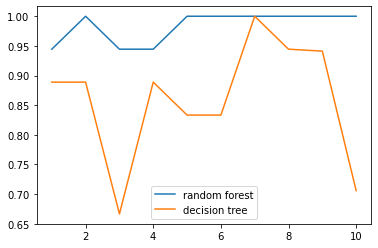

In [65]:


plt.figure()
plt.plot(range(1,11),rfc_scores,label="random forest")
plt.plot(range(1,11),dc_scores,label="decision tree")
plt.legend()
plt.show()

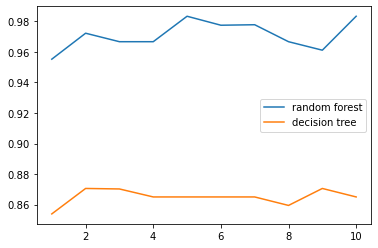

In [68]:
rfc_score_list = []
dc_score_list = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_score = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_score_list.append(rfc_score)

    dc = DecisionTreeClassifier()
    dc_score = cross_val_score(dc,wine.data,wine.target,cv=10).mean()
    dc_score_list.append(dc_score)

plt.figure()
plt.plot(range(1,11),rfc_score_list,label="random forest")
plt.plot(range(1,11),dc_score_list,label="decision tree")
plt.legend()
plt.show()

0.9888888888888889 22


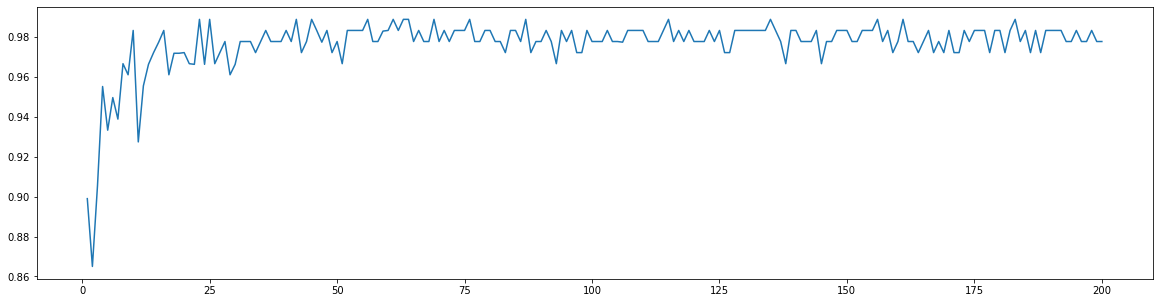

In [66]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

In [75]:
rfc = RandomForestClassifier(n_estimators=22,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

rfc.oob_score_

0.9775280898876404

In [76]:
rfc.feature_importances_

array([0.09495086, 0.03276288, 0.01456749, 0.01326259, 0.01393397,
       0.03631265, 0.18414   , 0.003398  , 0.01756472, 0.16875835,
       0.10652719, 0.14385985, 0.16996146])

In [77]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)
rfc.feature_importances_
rfc.apply(Xtest)
rfc.predict(Xtest)
rfc.predict_proba(Xtest)

array([[0.  , 0.96, 0.04],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.  , 0.04],
       [0.  , 1.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.84, 0.08, 0.08],
       [0.  , 1.  , 0.  ],
       [0.68, 0.32, 0.  ],
       [0.96, 0.  , 0.04],
       [0.08, 0.76, 0.16],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [0.08, 0.88, 0.04],
       [0.  , 1.  , 0.  ],
       [0.  , 0.12, 0.88],
       [0.  , 0.  , 1.  ],
       [0.  , 0.24, 0.76],
       [0.  , 0.08, 0.92],
       [0.28, 0.72, 0.  ],
       [0.88, 0.04, 0.08],
       [0.  , 0.04, 0.96],
       [0.  , 0.48, 0.52],
       [0.  , 0.04, 0.96],
       [0.04, 0.04, 0.92],
       [0.04, 0.  , 0.96],
       [0.  , 1.  , 0.  ],
       [0.  , 0.92, 0.08],
       [0.84, 0.12, 0.04],
       [0.96, 0.  , 0.04],
       [1.  , 0.  , 0.  ],
       [0.8 , 0.12, 0.08],
       [0.08, 0.92, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.12, 0.08, 0.8 ],
       [0.  , 0.32, 0.68],
 